## <span style="color:green"> Vision globale  </span>

■ Ce Dataset (Fraud) est pour la détection de transactions frauduleuses par carte de crédit .

■ La taille de ce Dataset est  471 MO

■ Les données de ce dataset sont disponibles au format CSV,  avec 6362620 lignes et 11 colonnes.

### <span style="color:green">Selon les informations disponibles sur ce dataset :</span>


####  ■   Dictionnaire des données :
***************************************************************************************
1. step : représente une unité de temps dans le monde réel. Dans ce cas, 1 étape équivaut à 1 heure de temps. Nombre total d'étapes : 744 (simulation sur 30 jours).
***************************************************************************************
2. type : CASH-IN, CASH-OUT, DEBIT, PAYMENT et TRANSFER.
***************************************************************************************
3. amount : montant de la transaction en monnaie locale.
***************************************************************************************
4. nameOrig : client ayant initié la transaction.
***************************************************************************************
5. oldbalanceOrg : solde initial avant la transaction.
***************************************************************************************
6. newbalanceOrig : nouveau solde après la transaction.
***************************************************************************************
7. nameDest : client destinataire de la transaction.
***************************************************************************************
8. oldbalanceDest : solde initial du destinataire avant la transaction. Notez qu'il n'y a pas d'information pour les clients dont le nom commence par M (commerçants).
***************************************************************************************
9. newbalanceDest : nouveau solde du destinataire après la transaction. Notez qu'il n'y a pas d'information pour les clients dont le nom commence par M (commerçants).
***************************************************************************************
10. isFraud : il s'agit des transactions effectuées par des agents frauduleux dans la simulation. Dans ce jeu de données spécifique, le comportement frauduleux des agents vise à réaliser un profit en prenant le contrôle des comptes des clients et en essayant de vider les fonds en les transférant vers un autre compte, puis en retirant les fonds du système.
***************************************************************************************
11. isFlaggedFraud : le modèle économique vise à contrôler les transferts massifs d'un compte à un autre et signale les tentatives illégales. Une tentative illégale dans ce jeu de données est une tentative de transférer plus de 200 000 lors d'une seule transaction.
***************************************************************************************

1. C'est un problème de classification binaire visant à prédire si une transaction est frauduleuse.
2. Données déséquilibrées avec seulement  8213 de transactions frauduleuses parmi 6354407 transactions.
3.  ➜ <span style="color:red"> </span>


 #### Si vous Veuillez avoir le Dataset  [cliquez ici](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data)
 
 

In [1]:
# on importe les bibliothéques utiles 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. La collection de données 

In [2]:
#Dataframe
data =pd.read_csv('Fraud.csv')


In [3]:

data.head(n=5)
## dernieres 5 
#data.tail()
##echatillon aléatoire
#data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



# 2. l'analyse exploratiore de données (EDA) :

In [4]:
#faire une copie 
df2 = data.copy()
print(df2.shape)

(6362620, 11)


In [5]:
# Obtenir la taille du fichier 
taille_en_octets = os.path.getsize('Fraud.csv' )

# Convertir en méga-octets (1 MO = 1024 * 1024 octets)
taille_fichier_mo = taille_en_octets / (1024 * 1024)

print(f'Taille du fichier est : {taille_fichier_mo} MO ')



Taille du fichier est : 470.67144680023193 MO 


In [6]:
# nbr total de données =  lignes * colonnes 
print('la taille de notre dataset est : ', df2.size)

la taille de notre dataset est :  69988820


In [7]:
#affichons tout les types des colonnes 
pd.set_option('display.max_row' ,30)
print('type de données de chaque colonnes\n\n', df2.dtypes)
print('\n___________________________________\n')
print('nbr de colonnes appartient à chaque type\n\n', df2.dtypes.value_counts())


type de données de chaque colonnes

 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

___________________________________

nbr de colonnes appartient à chaque type

 float64    5
int64      3
object     3
Name: count, dtype: int64


In [8]:
# remarque ,  on doit convertir les colonnes de type "Object" en type numérique avant d'entraîner le modèle .

Text(0.5, 1.0, 'Répartition des types de données')

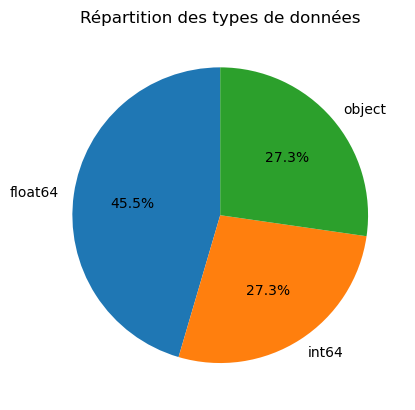

In [9]:
value_counts = df2.dtypes.value_counts()
#graphique en camembert pour la répartition des types de nos données
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Répartition des types de données")

In [10]:
#nous verifions s'il existe des valeurs manquantes dans les différentes colonnes :
(df2.isna().sum()/df2.shape[0]).sort_values(ascending=True)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [11]:
# on a aucune valeur manquante (nan)

In [12]:
# on veut voir la corrélation entre les colonnes
#la correlation ( mesure statistique ) sert à musurer la relation entre deux variables 

In [13]:
for col in df2.select_dtypes('object') :
    print(col)


type
nameOrig
nameDest


In [14]:
#on selectionne les lignes de type object pour les supprimer (on ne peut pas mesurer les vars de type string )
A = df2.select_dtypes('object')
co = df2.drop(A, axis=1)
co.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


chaque paire colonnes :

                ■ oldbalanceOrg , newbalanceOrig = 0.998803	
                                et
                ■ oldbalanceDest , newbalanceDest = 0.976569
                
               ➜ sont fortement liées (corrélées) , on doit supprimer  l'une d'entre elles de chaque paire de corrélations.

### analysons colonne amount :

In [15]:
df2[df2['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [16]:
P = df2[(df2['amount']==0) & (df2['isFraud']==1)].shape[0]/df2[df2['amount']==0].shape[0] * 100
P

100.0

In [17]:
# on remarque que toute les transactions qui ont 'amount' = 0 sont des fraudes 
# aussi , on voit que le type de transaction est ( CASH_OUT )

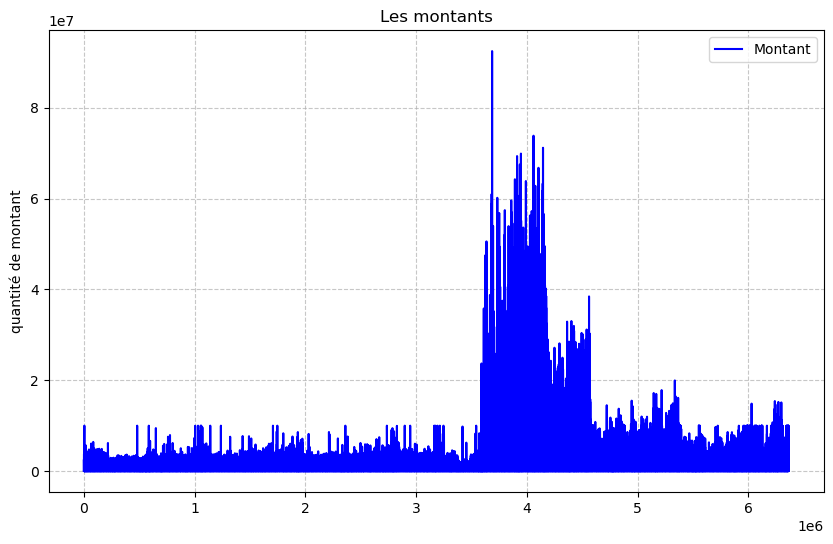

In [18]:
# visualisation de colonne montant
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé de la courbe
ax.plot(df2['amount'], color='b', label='Montant')
ax.set_title('Les montants')
ax.set_ylabel('quantité de montant')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [19]:
# La plupart des transactions 'amount' sont de petites sommes.
# il existe de transactions de grosse somme.
# qui implique une probabilité que ces transactions de grosse somme été effectuées par des fraudeurs .

### maintenant , on veut voir le cas de vider le compte en transferant toutes l'argent ('amount'=='oldbalanceOrg')

In [20]:
df2[(df2['amount']==df2['oldbalanceOrg']) ]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [21]:
# on verifie si toutes ces transactions sont des fraudes 
df2[(df2['amount']==df2['oldbalanceOrg']) & (df2['isFraud']==1) ]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [22]:
# donc pour toute 'amount'=='oldbalanceOrg' , c'est un fraude 
# qui signifie que le  fraudeurs ont vider les comptes en transferant toutes l'argent .

### analysons la colonne isFraud

In [23]:
df2.isFraud.value_counts()
# normalize= True

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition des fraudes')

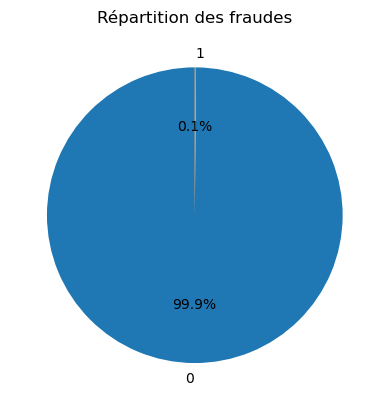

In [24]:
val = df2['isFraud'].value_counts()
#graphique en camembert 
plt.pie(val, labels=val.index, autopct='%1.1f%%', startangle=90)

plt.title("Répartition des fraudes")

In [25]:
# l'ensemble de données est  largement  déséquilibrées
# dans ce cas il va impacter notre modéle d'entrainnement , il faut le traiter .

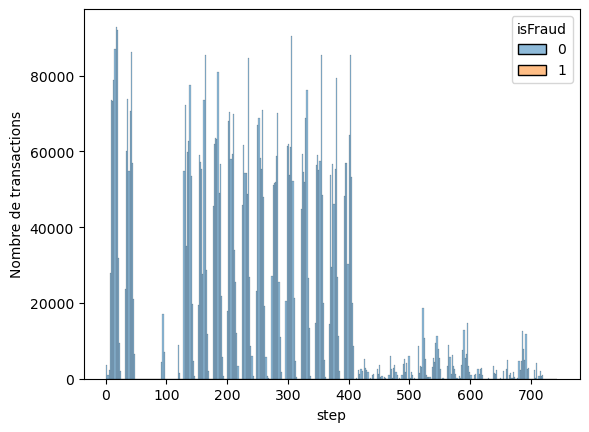

In [26]:
# step et isFraud
sns.histplot(x='step', data=df2,hue='isFraud');
plt.ylabel('Nombre de transactions')
plt.show()

In [27]:
# Il est difficile d'identifier la durée des transactions frauduleuses, 
# mais nous avons remarqué que la plupart des transactions sont en dessous de  400 heures.

### Analysons la colonne 'isFlaggedFraud'

In [28]:
df2[df2['isFlaggedFraud']==1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [29]:
# Toutes les transactions qui sont signalées comme fraudes sont vraiment des fraudes.

### Analysons la colonne 'type' 

In [30]:
df2['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

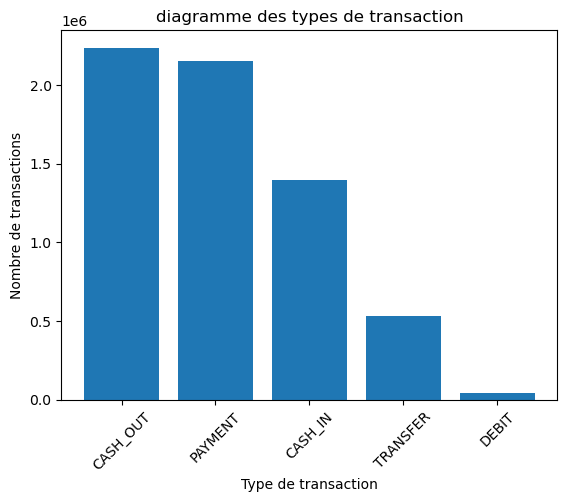

In [31]:
counts = df2['type'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions')
plt.title('diagramme des types de transaction')
plt.xticks(rotation=45)
plt.show()

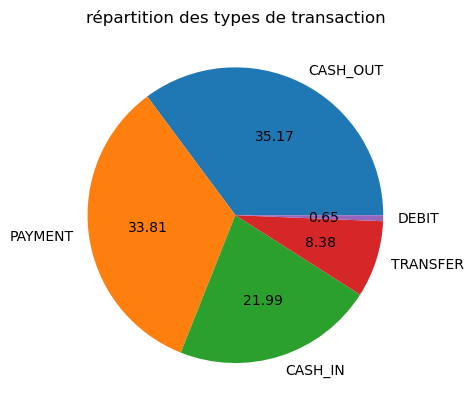

In [32]:
plt.pie(x = df2['type'].value_counts(),autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.title('répartition des types de transaction')
plt.show()

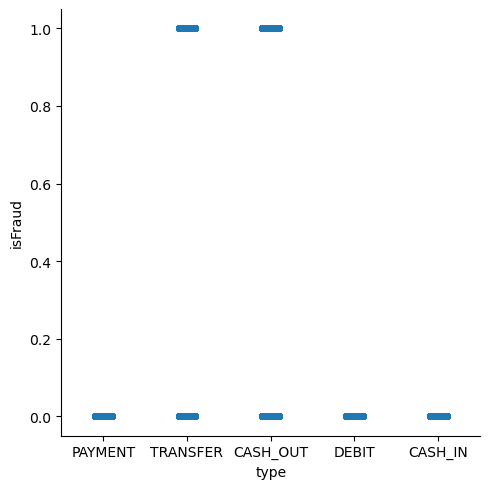

In [33]:
# type et isFraud
sns.catplot(data=df2, x="type", y="isFraud")

In [34]:
#la plupart des transactions frauduleuses sont effectuées avec "TRANSFER" et "CASH_OUT"

In [35]:
# le type cash_out : 
F1 = df2.loc[(df2['type']=="CASH_OUT") & (df2['isFraud']==1)]
F1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [36]:
# le type transfer
F2= df2.loc[(df2['type']=="TRANSFER") & (df2['isFraud']==1)]
F2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [37]:
# F1.shape[0] + F2.shape[0] == df2['isFraud'].shape[0]

F1.shape[0] + F2.shape[0] == df2[df2['isFraud'] == 1].shape[0]


True

In [38]:
# On peut meme verifier directement avec groupby()
df2.groupby(['isFraud', 'type']).size().unstack(fill_value=0)


type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


In [39]:
# donc on remarque que toutes les transactions frauduleuses sont entre les types : "CHASH_OUT" et "TRANSFER"

# 3. Prétraitement de données  (pre-processing) : 
#### encodage :
         convertir les données qualitatives en valeurs numériques
         
#### normalisation :
         mettre sur une meme echelle toutes  les variables quantitatives qui va facilite le ML
         
#### imputation :
         remplacer les données manquantes par certaines valeurs statistiques
         
#### selection :
         selectionner les variables les plus utiles pour le modele, tout en éliminant celles qui n'apportent pas de valeur
         significative
         
#### extraction : 
         generer de nouvelles variables à partir d'informations cachés dans le dataset
         
#### Nettoyage : 
        Traiter les données pour éliminer les erreurs, les valeurs aberrantes et les redondances  

### 3.1. vérifions s'il existe des valeurs manquantes(NaN) ou des mots vides : (imputation)

In [40]:
#les colonnes contiennent des valeurs null ?
print(df2.isnull().any())
print('_____________________________________')

#les colonnes contiennent 'nbr' des NaN
print(df2.isnull().sum())
print('_____________________________________')

#les colonnes contiennent 'nbr' des valeurs vides 
print(df2.eq('').sum())

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool
_____________________________________
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
_____________________________________
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [41]:
#on remarque qu'on n'a aucun mot vide ('')
#les colonnes ne contiennent pas des valeurs manquantes

### 3.2. les colonnes fortement corrélées : (selection )

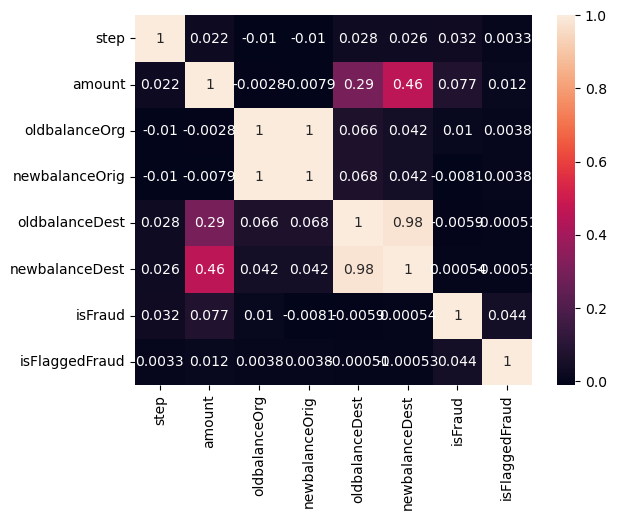

In [42]:
# on a trouvé précédement qu'il y avait une forte corrélation entre chaque deux paire de ces colonnes :
"""

oldbalanceOrg , newbalanceOrig = 0.998803
                            
oldbalanceDest , newbalanceDest = 0.976569

"""
# on va revoir la correlation avec seaborn 
sns.heatmap(co.corr(), annot=True)
plt.show()


In [43]:
#avant de choisir les colonnes à supprimer pour chaque paire ,
# on va voir la corrélation de chaqu'une avec la variable target 'isFraud'
co.corr()['isFraud']


step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

In [44]:
# on remarque que 'oldbalanceOrg'  et 'oldbalanceDest' sont plus corrélées avec la target 'isFraud'
# 'oldbalanceDest' , 'newbalanceDest' sont moins corrélées avec 'isFraud'

#### donc on supprime ces deux derniers

In [45]:
df2 = df2.drop(columns=['newbalanceDest', 'newbalanceOrig'])


### 3.3. les valeurs aberrantes : (nettoyage)


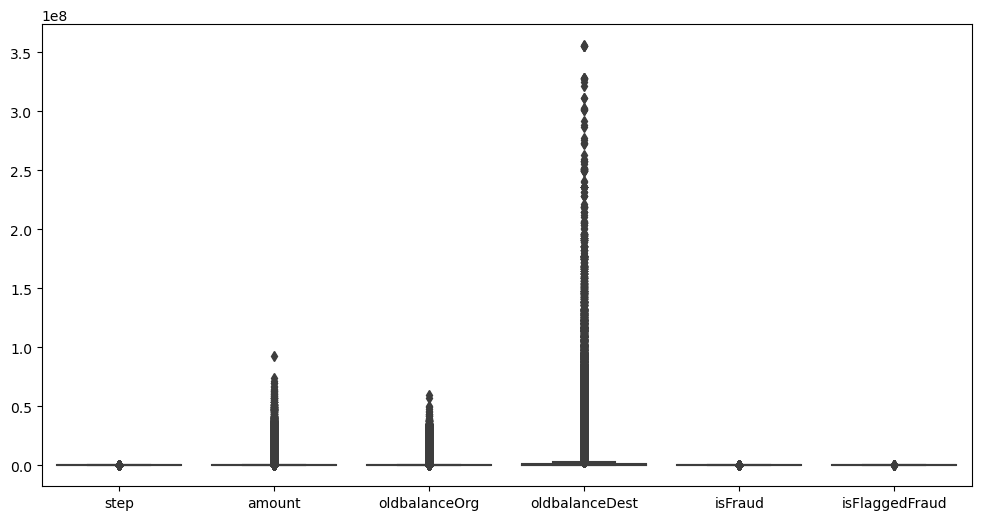

In [46]:
# visualisons la distribution des données et des valeurs aberrantes .
fig = plt.figure(figsize=(12,6))
sns.boxplot(df2)
plt.show()

<Axes: >

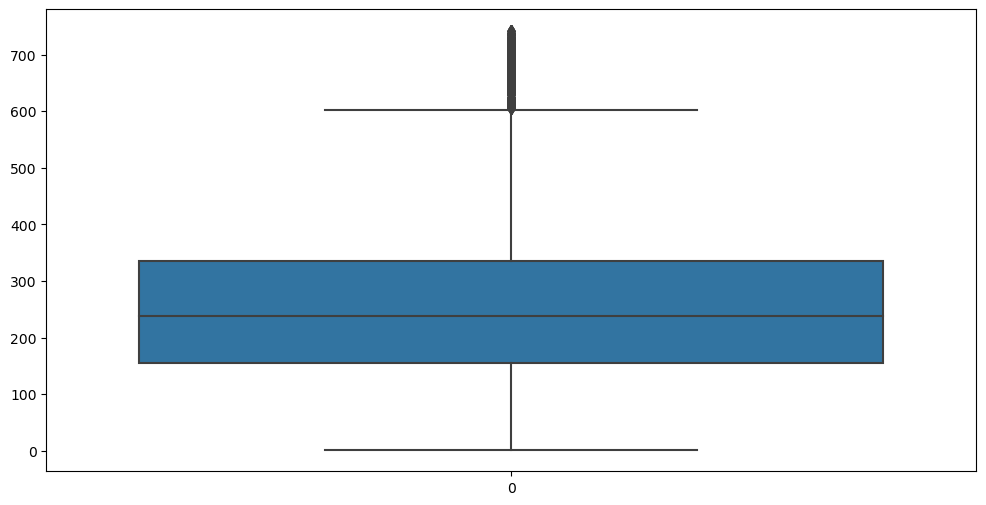

In [47]:
 # pour 'step' , on va voir en détails
fig = plt.figure(figsize=(12,6))
sns.boxplot(df2['step'])

In [48]:
# on remarque qu'on a des valeurs extrémes 
# on veut maintenant récuperer ces outliers

In [49]:
def trouver_outliers(i):
    Q1 = df2[i].quantile(0.25)

    Q3 = df2[i].quantile(0.75)

    EIQ = Q3 - Q1

    LI= Q1 - (1.5*EIQ)

    LS= Q3 + (1.5*EIQ)
    print("la limite inférieur est ",LI)
    print("la limite superieur est ",LS)
    out_min = df2[df2[i] < LI]
    out_max =  df2[df2[i] > LS]
    print('le nombre des outliers qui sont inf ', out_min.shape[0])
    print('le nombre des outliers qui sont sup ', out_max.shape[0])
    

In [50]:
trouver_outliers('step')

la limite inférieur est  -112.5
la limite superieur est  603.5
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  102688


In [51]:
# on a plus de 102000 des outliers

In [52]:
trouver_outliers('amount')

la limite inférieur est  -279608.29125
la limite superieur est  501719.33875
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  338078


In [53]:
# on a plus de 300000 des outliers

In [54]:
trouver_outliers('oldbalanceOrg')

la limite inférieur est  -160972.7625
la limite superieur est  268287.9375
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  1112507


In [55]:
# on a plus de 1 million des outliers

In [56]:
trouver_outliers('oldbalanceDest')

la limite inférieur est  -1414555.06125
la limite superieur est  2357591.76875
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  786135


In [57]:
# on a plus de 700000 des outliers

In [58]:
# on voie qu'il y a plusieurs valeurs aberrantes dans ces colonnes.
# on ne peut pas supprimer ces valeurs puisqu'on va perdre plusieurs informations utiles : 
# pour 'amount' , 'oldbalanceOrg' , si la quantité de monnaie est plus élevé , elle peut etre une transaction frauduleuse


### 3.4. vérifions s'il existe des duplications :  (Nettoyage)

In [59]:
#la duplication 

df2.duplicated().sum()

0

In [60]:
# on remarque qu'il n'exsite pas de duplication

### 3.5. les variables qualitatives : ( selection et encodage)

In [61]:
# on affiche les colonnes de type object
for col in df2.select_dtypes('object') :
    print(col)

type
nameOrig
nameDest


In [62]:
for col in df2.select_dtypes('object') :
    print(f'{col:-<20}{df2[col].unique()}\n')
    print('       _________________________________________________________________\n')

type----------------['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

       _________________________________________________________________

nameOrig------------['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']

       _________________________________________________________________

nameDest------------['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']

       _________________________________________________________________



#### pour la colonne 'type'  :

In [63]:
#'type' a 5 valeurs uniques.
# donc on peut manipuler (encoder) cette colonne 

In [64]:
#encodage de la colonne 'type' : 
df2['type'] = df2['type'].replace(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],[1, 2, 3, 4, 5])

In [65]:
df2.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
866351,42,1,10657.26,C1918652261,374.0,M876572723,0.00,0,0
5867586,403,3,20706.37,C1137017598,0.0,C708108302,361621.03,0,0
4909689,349,1,11736.85,C672771791,0.0,M1009214053,0.00,0,0
2436792,203,3,323812.17,C353758685,0.0,C606391197,498326.08,0,0
2391856,201,5,55112.04,C195235657,93174.0,C453762846,28300.00,0,0


#### pour les deux colonnes 'nameOrg' et 'nameDest'

In [66]:

# on remarque que 'nameOrg' et 'nameDest' ont beaucoups de valeurs uniques

#### on commence par verifier "nameOrg" :

In [67]:
A = df2['nameOrig'].unique()
A.shape[0]

6353307

In [68]:
B = df2['nameOrig']
B.shape[0]

6362620

In [69]:
(f'le pourcentage des valeurs unique pour la colonne "nameOrig" est {A.shape[0] / B.shape[0] * 100}%')

'le pourcentage des valeurs unique pour la colonne "nameOrig" est 99.85362947967975%'

In [70]:
# il y a beaucoups de valeurs uniques (99.85%)

In [71]:
#### on verifier "nameDest" :

In [72]:
A = df2['nameDest'].unique()
A.shape[0]

2722362

In [73]:
B = df2['nameDest']
B.shape[0]

6362620

In [74]:
(f'le pourcentage des valeurs unique pour la colonne "nameOrig" est {A.shape[0] / B.shape[0] * 100}%')

'le pourcentage des valeurs unique pour la colonne "nameOrig" est 42.78680795018404%'

In [75]:
# on a trops de de valeurs uniques (43%)

In [76]:
"""
En regardant les % obtenues ('nameOrig' et 'nameDest') ,  on remarque qu'il y a beaucoups de valeurs uniques ,
En plus , ces colonnes ne contiennent que des strings ,ce qui les rend moins utiles  à prédire la fraude.
on va essayer de réduire le nbr des valeurs uniques

"""

"\nEn regardant les % obtenues ('nameOrig' et 'nameDest') ,  on remarque qu'il y a beaucoups de valeurs uniques ,\nEn plus , ces colonnes ne contiennent que des strings ,ce qui les rend moins utiles  à prédire la fraude.\non va essayer de réduire le nbr des valeurs uniques\n\n"

#### Avant de  supprimer 'nameOrig' et 'nameDest' , on veut voir plus profondement si ces colonnes peuvent avoir des informations utiles : 

In [77]:
# on  parcourt chaque premier caractère unique dans la colonne spécifiée 
def trouver_char_unique(i) :
    for caractere in df2[i].str[0].unique() :
        
        matching_rows = df2[df2[i].str.startswith(caractere)]
        print(f"Caractère : {caractere}")
        print(matching_rows[i])
        print("==========")


# df2 = df2.drop(columns=[ 'nameOrig' ,  'nameDest'])

In [78]:
# on commence par nameDest
trouver_char_unique('nameDest')

Caractère : M
0          M1979787155
1          M2044282225
4          M1230701703
5           M573487274
6           M408069119
              ...     
6362312    M1112540487
6362314    M1878955882
6362316     M675916850
6362318    M1126011651
6362319     M747723689
Name: nameDest, Length: 2151495, dtype: object
Caractère : C
2           C553264065
3            C38997010
9           C195600860
10          C997608398
15          C476402209
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 4211125, dtype: object


In [79]:
# on remarque qu'il y a deux caractéres 'C' et 'M'
# à partir de dictionnaire ,les transactions avec un destinataire dont le nom commence par "C" 
# sont des transactions où l'argent est envoyé à des clients particuliers.

# les transactions avec un destinataire dont le nom commence par "M" 
#sont des transactions où l'argent est envoyé à des entreprises ou des commerçants.

In [80]:
# maintenant, je veux voir si les transactions frauduleuses ont été effectuées en direction des individus où des entreprises 
def nbr_tans_fraud(i) :
    
    for caractere in df2[i].str[0].unique() :
        
        frauds_by_character = df2[df2['isFraud'] == 1][i].str.startswith(caractere)
        print(f'pour les lignes qui commence par caractere :{caractere} il y a {frauds_by_character.sum()} fraudes')
nbr_tans_fraud('nameDest') 
        
#         for caractere in df2['nameDest'].str[0].unique() :
        
#         frauds_by_character = df2[df2['isFraud'] == 1]['nameDest'].str.startswith(caractere)
#         print(f'pour les lignes qui commence par caractere :{caractere} il y a {frauds_by_character.sum()} fraudes')


pour les lignes qui commence par caractere :M il y a 0 fraudes
pour les lignes qui commence par caractere :C il y a 8213 fraudes


In [81]:
# alors , les transactions frauduleuses sont envoyées à des individus

In [82]:
# pour 'nameOrg' 
trouver_char_unique('nameOrig')

Caractère : C
0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: object


In [83]:
# on remarque que toutes les transaction sont sont effectuées par des individus , incluent les transactions frauduleuses
# allez , on verifie  : 

In [84]:
nbr_tans_fraud('nameOrig')

pour les lignes qui commence par caractere :C il y a 8213 fraudes


In [85]:
# ce qui est le cas .

In [86]:
# remplaçons des caractères uniques dans la colonne spécifiée (encodage)

def remplacer_uniques (i) :
    
    for caractere in df2[i].str[0].unique():
        matching_rows = df2[df2[i].str.startswith(caractere)]
        df2.loc[matching_rows.index, i] = caractere


In [87]:
remplacer_uniques ('nameDest')
remplacer_uniques ('nameOrig')

In [88]:
df2.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
3702658,277,3,487923.10,C,0.00,C,499365.29,0,0
3569453,260,1,4576.26,C,21058.62,M,0.00,0,0
3856234,283,3,52933.65,C,0.00,C,3619446.74,0,0
575756,25,1,14982.08,C,705.00,M,0.00,0,0
4419749,322,5,114961.03,C,30271.00,C,0.00,0,0


In [89]:
# on peut dire que le cas de 'nameOrig'= C et 'nameDest'=C  a la grande probabilité d'etre un fraude 

In [90]:
# on verifie :
# Sélectionnons les transactions frauduleuses  où 'nameOrig'  et 'nameDest' sont  égal à 'C'
subset = df2[(df2['nameOrig'] == 'C') & (df2['nameDest'] == 'C') & (df2['isFraud'] == 1)]

print(f"Pour les transactions où 'nameOrig' est égal à 'C' et 'nameDest' est également égal à 'C':", subset.shape[0])


Pour les transactions où 'nameOrig' est égal à 'C' et 'nameDest' est également égal à 'C': 8213


In [91]:
# on veut voir si toutes les transactions frauduleuses de dataframe sont dans 'nameOrig'== 'C' et 'nameDest'== 'C'
if df2[df2['isFraud'] == 1].shape[0] == subset.shape[0] :
    print('true')
else :
    print('false')


true


In [92]:
# qui est vrai

### La Normalisation : 
          mettre les variables quantitatives dans la meme echelle. 
        il existe beaucoups de techniques , les 3 les plus connues :- normalisation min_max. ( X-Xmin / Xmax-Xmin )
                                                                    - standardisation standardscaler. ( X-Ux / Sx )
                                                                    - transformer robuste scaler. ( X-mediane / EIQ )
                                                                    
PUISQUE On a des outliers , on va éviter d'utiliser min_max et standardScaler                                                                    